**Linear Classifier (math)**

  - X1: Humidity
  
  - X2: Pressure
  
  - h(X1,X2) = w0 + w1x1 + w2x2

**Differently**

  - Weight Vector W: (w0, w1, w2)
  
  - Input vector x : (1, x1, x2)
  
  - Function (dot-product): x.w : w0 + w1x1 + w2x2
  
  - h(x) = w.x
  
  
**Perceptron Classifier**

  - Is a linear algorithm that can be applied to binary classification 

**Perceptron Learning Rule**

 - Given data point x,y updata each weight accornding to 
 
   - Wi = Wi + a(y -h(x)). Xi
   
   - Wi = Wi + a(actual value - estimate). Xi
    
      a: learning rate

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/files/weather.csv', parse_dates=True, index_col=0)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [3]:
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [5]:
dataset = data[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']].dropna()

In [6]:
X = dataset[['Humidity3pm', 'Pressure3pm']]
y = dataset['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7729468599033816

In [9]:
sum(y == 0)/len(y)

0.7407071622846781

C:\Users\JOEL BUMBA\Anaconda\envs\plotlyenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


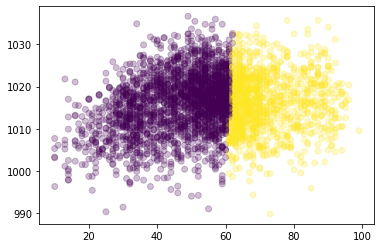

In [10]:
fig, ax = plt.subplots()
X_data = X.to_numpy()

y_all = clf.predict(X_data)
ax.scatter(x=X_data[:,0], y=X_data[:,1], c=y_all, alpha=.25)

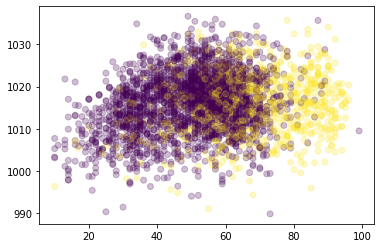

In [11]:
fig, ax = plt.subplots()

ax.scatter(x=X_data[:,0], y=X_data[:,1], c=y, alpha=.25)